# 05_firm_growth_tasset_consecutive19-11

In [1]:
import pandas as pd
import numpy as np
import fs_qe as fq

%matplotlib inline

In [2]:
%%time
df_us = pd.read_csv('data/US_tasset.csv')
df_us = df_us[['id', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].set_index('id')

CPU times: user 54.6 ms, sys: 9.61 ms, total: 64.3 ms
Wall time: 65.1 ms


In [3]:
df_us5 = fq.preprocess_data(df_us, var1='tasset', var2='logtasset')

/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [4]:
df_us6 = df_us5[df_us5['fgrow_log'] != 0.0]
df_us7 = df_us6[df_us6['fgrow_log'] != np.inf]
df_us8 = df_us7[df_us7['fgrow_log'] != - np.inf]
df_us9 = df_us8[df_us8['tasset'] != 0.0]
df_us10 = df_us9[df_us9['logtasset'] > 0.0]
df_us10.to_csv('data/US_asset.csv')

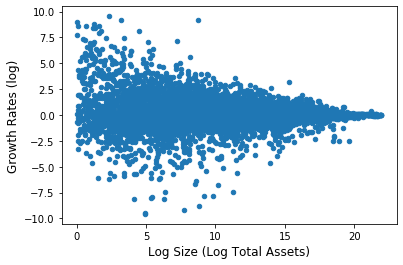

In [5]:
fq.scatterplot(df_us10, x='logtasset', y='fgrow_log', xlabel='Log Size (Log Total Assets)')